In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [2]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
len(flags)

274

In [22]:
qtp = cv2.imread('quin_to_pthalo.png')



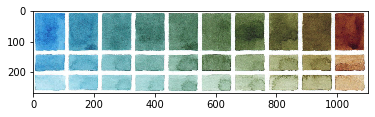

In [23]:
plt.imshow(qtp)

In [26]:
pixel_colors = qtp.reshape((np.shape(qtp)[0]*np.shape(qtp)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [27]:
hsv_qtp = cv2.cvtColor(qtp, cv2.COLOR_BGR2HSV)

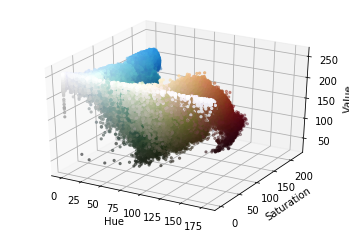

In [28]:
h, s, v, = cv2.split(hsv_qtp)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [96]:
h.shape

(269, 1101)

In [342]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, random_state=42)
labels = kmeans.fit_predict(h)
#image2show = kmeans.cluster_centers_[kmeans.labels_]

In [343]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(h,labels)

In [344]:
print(silhouette_avg)

0.17029788185996528


In [147]:
sample_sil = silhouette_samples(h,labels)

In [148]:
sample_sil

array([ 5.10487042e-01,  6.18069275e-01,  6.00653449e-01,  6.14118318e-01,
        6.12593769e-01,  0.00000000e+00,  3.43732703e-02,  5.31402427e-02,
        3.78565140e-02,  2.96089822e-02,  3.56008658e-02,  4.08394357e-02,
        1.55876098e-02,  2.61297960e-01,  2.80413433e-01,  2.77565581e-01,
        2.49029903e-01,  2.17827204e-01,  2.59794461e-01,  2.31818635e-01,
        1.58078564e-01,  2.02323997e-01,  1.93509141e-01,  1.95180896e-01,
        1.94116141e-01,  1.42440270e-01,  2.02272496e-01,  6.10757040e-02,
        8.47008697e-02,  7.80403941e-02,  5.10685988e-02,  4.72099650e-02,
       -2.35363663e-02,  1.18610219e-02,  2.05402200e-02,  5.57466327e-02,
        8.23750539e-02,  9.48312403e-02,  5.46509775e-02,  6.49833628e-02,
        4.30311186e-02,  8.02256882e-02,  2.00841626e-02,  7.40229420e-02,
        6.17600749e-02,  6.57107358e-02,  6.57680200e-02,  6.16529607e-02,
        4.28886747e-02,  6.51163736e-02,  2.73831159e-01,  2.89146860e-01,
        2.37865607e-01,  

TypeError: Invalid shape (269,) for image data

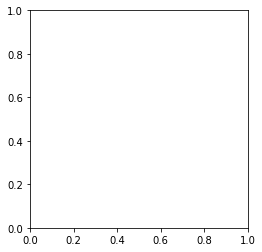

In [349]:
plt.imshow(predict)


In [91]:
image2show.shape

(269, 1101)

In [346]:
predict = kmeans.predict(h)

KeyboardInterrupt: 

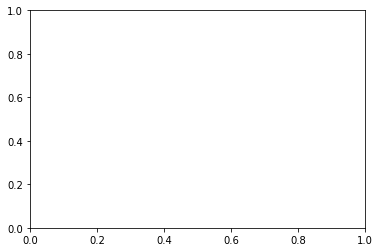

In [347]:
plt.hist(h)

In [ ]:
predict.shape

In [348]:
np.unique(predict).size

30

(array([60., 16., 50., 59.,  2.,  5.,  3., 69.,  2.,  3.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

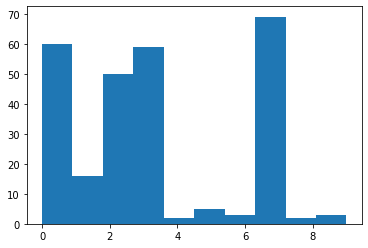

In [94]:
plt.hist(predict, bins=10)

In [167]:
from skimage import io
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [338]:
image_slic = seg.slic(qtp, compactness = 10000, n_segments = 10, sigma = 10, enforce_connectivity = True)

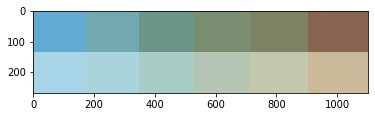

In [339]:
plt.imshow(color.label2rgb(image_slic, qtp,kind='avg'))

In [340]:
np.unique(image_slic).size

12